# Capstone Project 2

## Data Wrangle

Importing packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

First, we read te file and have a brief review to see what types of data we have in the table.

In [2]:
data = pd.read_csv('bank-additional-full.csv', header = 0,sep = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

As we can see, there are three types of data: `float64`, `int64` and `object`. In every column we have 100% non-null elements. Now we will seek for missing NaN values.

In [4]:
# NaN missing values
data.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

It does not appear to be any missing values (`NaN`) in the data; yet it is possible that a missing value could be registered with another symbol. In the following lines, we separete the columns by its `dtypes`. 

In [5]:
cats = data.select_dtypes(include ='object')
ints = data.select_dtypes(include = 'int64')
floats = data.select_dtypes(include = 'float64')

We transform non numerical values to a categorical dtype.

In [6]:
cats = cats.astype('category')
cats.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


We need to analyse every set of data, beginning with the categorical data for which we will analyze its unique values seeking for entries that refer to the same category with different names. We create a dictionary with the unique values of each categorical column in `cats` table.

In [7]:
uniques = {k:cats[k].unique() for k in cats}
uniques

{'job': ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', ..., 'unemployed', 'self-employed', 'unknown', 'entrepreneur', 'student']
 Length: 12
 Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown'],
 'marital': ['married', 'single', 'divorced', 'unknown']
 Categories (4, object): ['divorced', 'married', 'single', 'unknown'],
 'education': ['basic.4y', 'high.school', 'basic.6y', 'basic.9y', 'professional.course', 'unknown', 'university.degree', 'illiterate']
 Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'],
 'default': ['no', 'unknown', 'yes']
 Categories (3, object): ['no', 'unknown', 'yes'],
 'housing': ['no', 'yes', 'unknown']
 Categories (3, object): ['no', 'unknown', 'yes'],
 'loan': ['no', 'yes', 'unknown']
 Categories (3, object): ['no', 'unknown', 'yes'],
 'contact': ['telephone', 'cellul

The unique values can thus be used as our main categories for each column. Needless to say that in this type of data we ought to have duplicated values since they refer to attributes that are shared by many contacts.

## Integers

In order to analyze the numerical data sets, we must first plot histogams in which we can detect outliers.

In [8]:
ints.describe()

,age,duration,campaign,pdays,previous
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963
std,10.42125,259.279249,2.770014,186.910907,0.494901
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


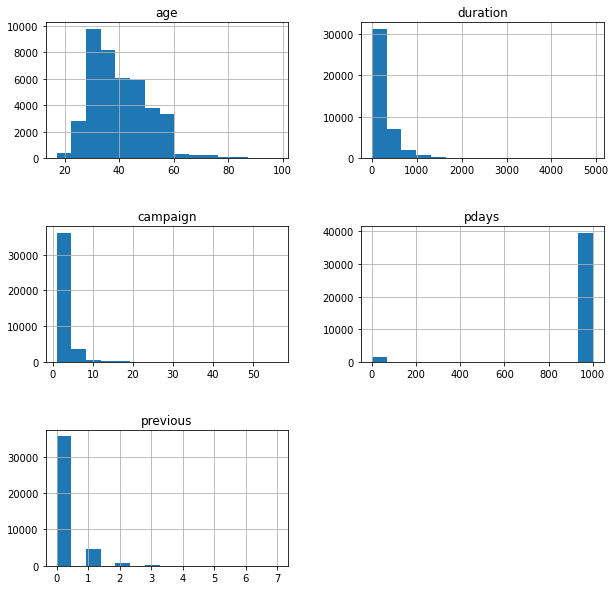

In [9]:
ints.hist(figsize = (10,10), bins = 15)
plt.subplots_adjust(hspace = 0.5);

The only "weird" outlier set of data can be seen in `pdays` since the number '999' is used to denote that the user was not previously contacted by the bank. This outlier cannot be deleted since the information it reveals is important. We must know whether the costumer was previously contacted or not.

### pdays
It is convenient to analyse the column pdays not taking into account the entry "999" which refers to clients that were not previously contacted

In [10]:
ints['pdays'][ints['pdays'] != 999].describe()

count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        27.000000
Name: pdays, dtype: float64

In [11]:
ints['pdays'][ints['pdays'] == 999].count()

39673

Perhaps it might be useful to treat the `pdays`data as categorical:

Text(0.5, 1.0, 'Frequency of Number of days of previous contact')

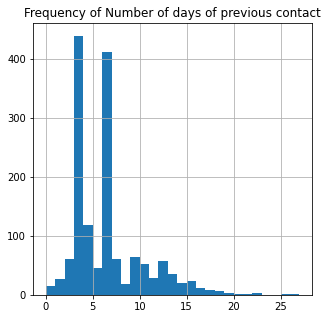

In [12]:
c_pdays = ints['pdays'].astype('category')
c_pdays[c_pdays != 999].hist(figsize = (5,5), bins = 27)
plt.title('Frequency of Number of days of previous contact')

Among those who were previously called, (only 1515 people), we can see that more than 60% of them were called either 3 or 6 times before.

In [13]:
ints.pdays[np.logical_and(ints['pdays']>=3, ints['pdays']<=6)].count() / len(ints.pdays[ints.pdays != 999])

0.66996699669967

### Duration
The frequency distribution shows a large amount of data located before 1000 seconds;yet, it seems to be some data far above this amount of time.

In [14]:
ints['duration'][ints['duration']>1000].count()

956

956 of 41188 entries show to have a duration greaterthan 1000 seconds. 

In [15]:
ints['duration'][ints['duration']>1000].count()/len(ints['duration'])

0.023210643876857336

The total amount of entries whose duration is greater than 1000 seconds is around the 2.32% of the total of entries in our table.

#### Campaign

<AxesSubplot:>

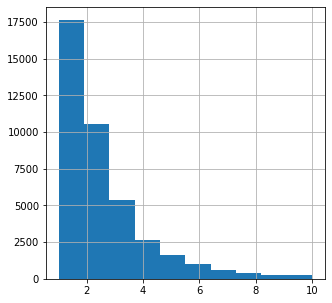

In [16]:
ints['campaign'][ints.campaign <= 10].hist(figsize=(5,5))

In [17]:
ints['campaign'][ints.campaign <= 7].count()/len(ints['campaign'])

0.9568563659318248

More than 95% of the clients recevied less than 10 contacts including last contact.

#### Previous

In [18]:
ints.previous[ints.previous != 0].count()

5625

In [19]:
ints.previous[ints.previous <= 1].count() / len(ints.previous)

0.9741672331747111

<AxesSubplot:>

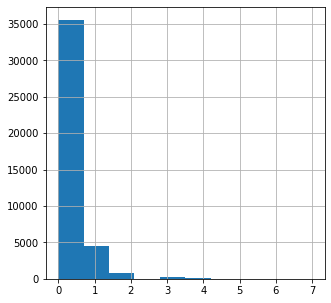

In [20]:
ints.previous.hist(figsize=(5,5))

Almost the entire set of clients (97%) received less than 2 previous contacts

## Float Data Analysis

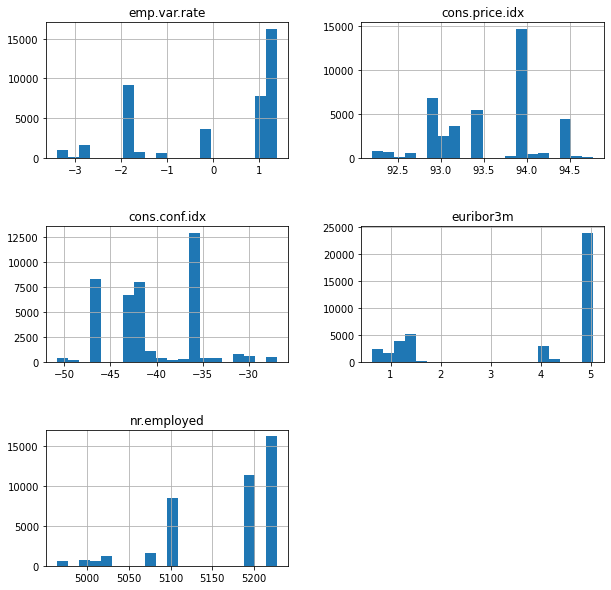

In [21]:
floats.hist(figsize = (10,10), bins = 20)
plt.subplots_adjust(hspace = 0.5);

In [22]:
floats.describe()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,1.570960,0.578840,4.628198,1.734447,72.251528
min,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,1.400000,94.767000,-26.900000,5.045000,5228.100000


The floats data seem to have very specific intervals in which most of the values can be located.

## EDA PART 2

In [23]:
cats.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [24]:
cats['y'].replace('no',0,inplace = True)
cats['y'].replace('yes',1,inplace = True)


In [25]:
cats['y'] = pd.to_numeric(cats['y'])

In [26]:
cats.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0


First, I want to know the more common jobs among the interviewed people.

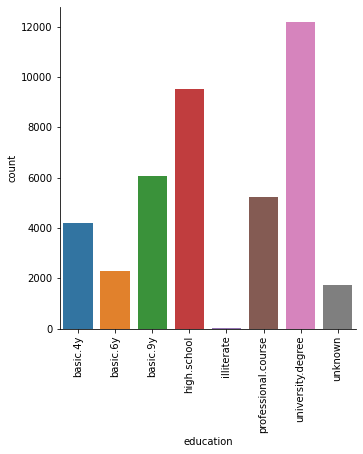

In [27]:
sns.catplot(x = 'education', data = cats, kind = 'count')
plt.xticks(rotation = 90)
plt.show()

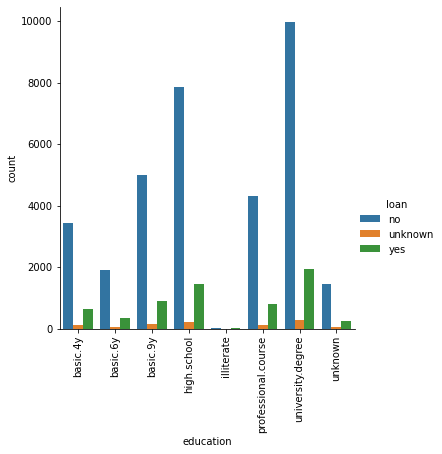

In [28]:
sns.catplot(x = 'education', data = cats, kind = 'count', hue = 'loan')
plt.xticks(rotation = 90)
plt.show()

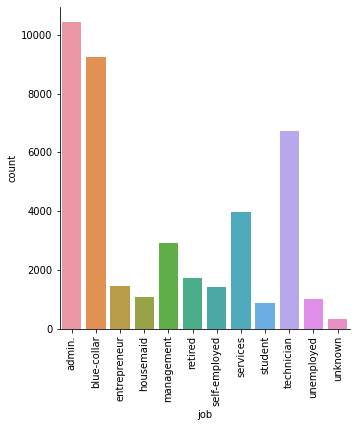

In [29]:
sns.catplot(x = 'job', data = cats, kind = 'count')
plt.xticks(rotation = 90)
plt.show()

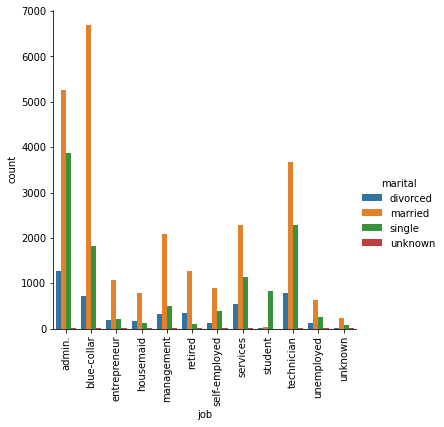

In [30]:
sns.catplot(x = 'job', data = cats, kind = 'count', hue = 'marital')
plt.xticks(rotation = 90)
plt.show()

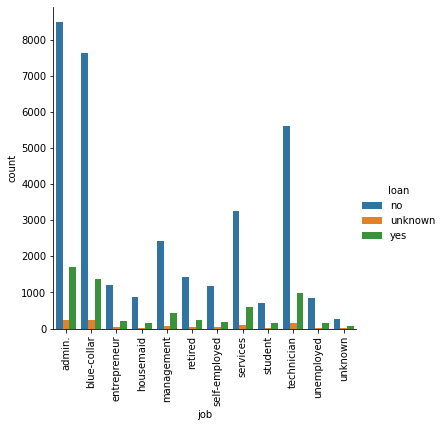

In [31]:
sns.catplot(x = 'job', data = cats, kind = 'count', hue = 'loan')
plt.xticks(rotation = 90)
plt.show()

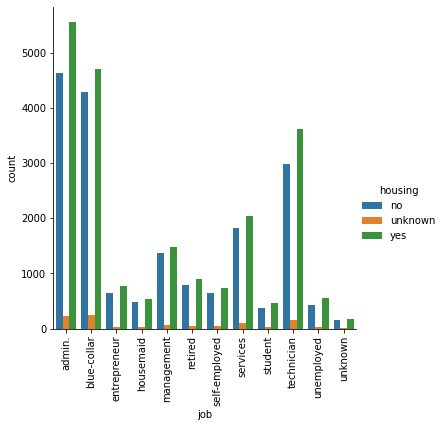

In [32]:
sns.catplot(x = 'job', data = cats, kind = 'count', hue = 'housing')
plt.xticks(rotation = 90)
plt.show()

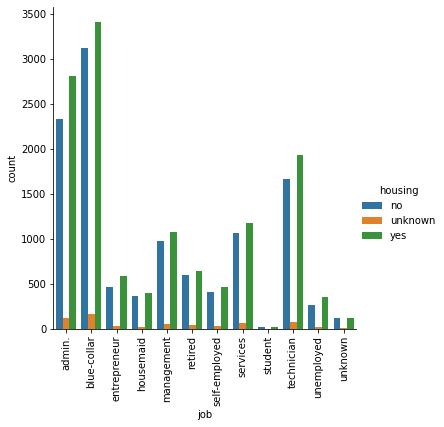

In [33]:
sns.catplot(x = 'job', data = cats[cats.marital == 'married'], kind = 'count', hue = 'housing')
plt.xticks(rotation=90)
plt.show()

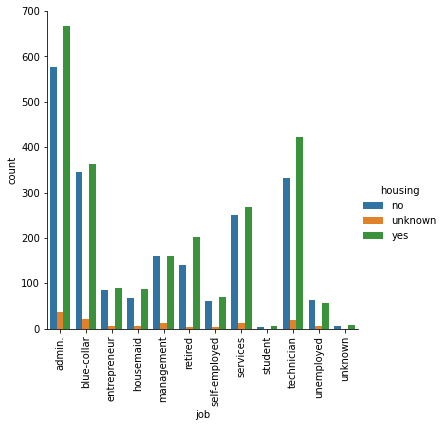

In [34]:
sns.catplot(x = 'job', data = cats[cats.marital == 'divorced'], kind = 'count', hue = 'housing')
plt.xticks(rotation=90)
plt.show()

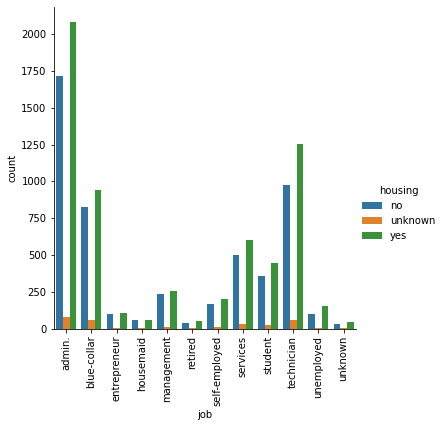

In [35]:
sns.catplot(x = 'job', data = cats[cats.marital == 'single'], kind = 'count', hue = 'housing')
plt.xticks(rotation=90)
plt.show()

More than half of our sample have jobs included in only three labels: "admin", "blue-collar", and "technician"

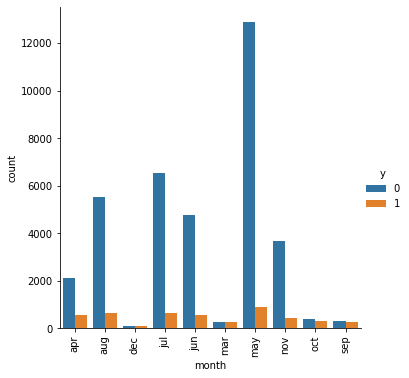

In [36]:
sns.catplot(x = 'month', hue = 'y', data = cats,kind = 'count')
plt.xticks(rotation = 90)
plt.show()

In [37]:
monthly = cats.groupby('month').sum().join(cats.groupby('month').count()['y'], how = 'outer', lsuffix = '_yes', rsuffix = 'tot')
monthly['prop'] = monthly['y_yes'].div(monthly['ytot'])
monthly

,y_yes,ytot,prop
month,,,
apr,539,2632,0.204787
aug,655,6178,0.106021
dec,89,182,0.489011
jul,649,7174,0.090466
jun,559,5318,0.105115
mar,276,546,0.505495
may,886,13769,0.064347
nov,416,4101,0.101439
oct,315,718,0.438719


In [38]:
eduly = cats.groupby('education').sum().join(cats.groupby('education').count()['y'], how = 'outer', lsuffix = '_yes', rsuffix = 'tot')
eduly['prop'] = eduly['y_yes'].div(eduly['ytot'])
eduly

,y_yes,ytot,prop
education,,,
basic.4y,428,4176,0.102490
basic.6y,188,2292,0.082024
basic.9y,473,6045,0.078246
high.school,1031,9515,0.108355
illiterate,4,18,0.222222
professional.course,595,5243,0.113485
university.degree,1670,12168,0.137245
unknown,251,1731,0.145003


In [39]:
daily = cats.groupby('day_of_week').sum().join(cats.groupby('day_of_week').count()['y'], how = 'outer', lsuffix = '_yes', rsuffix = 'tot')
daily['prop'] = daily['y_yes'].div(daily['ytot'])
daily

,y_yes,ytot,prop
day_of_week,,,
fri,846,7827,0.108087
mon,847,8514,0.099483
thu,1045,8623,0.121188
tue,953,8090,0.117800
wed,949,8134,0.116671


In [40]:
poutly = cats.groupby('poutcome').sum().join(cats.groupby('poutcome').count()['y'], how = 'outer', lsuffix = '_yes', rsuffix = 'tot')
poutly['prop'] = poutly['y_yes'].div(poutly['ytot'])
poutly

,y_yes,ytot,prop
poutcome,,,
failure,605,4252,0.142286
nonexistent,3141,35563,0.088322
success,894,1373,0.651129


### Floating point data

In [41]:
floats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   emp.var.rate    41188 non-null  float64
 1   cons.price.idx  41188 non-null  float64
 2   cons.conf.idx   41188 non-null  float64
 3   euribor3m       41188 non-null  float64
 4   nr.employed     41188 non-null  float64
dtypes: float64(5)
memory usage: 1.6 MB


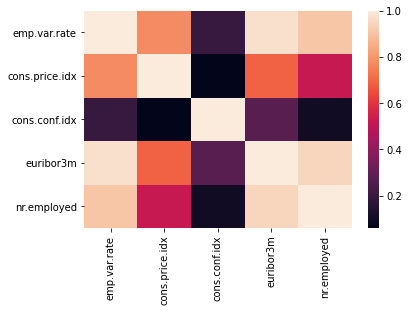

In [42]:
# Floating point dataset correlation heatmap
sns.heatmap(floats.corr())
plt.show()

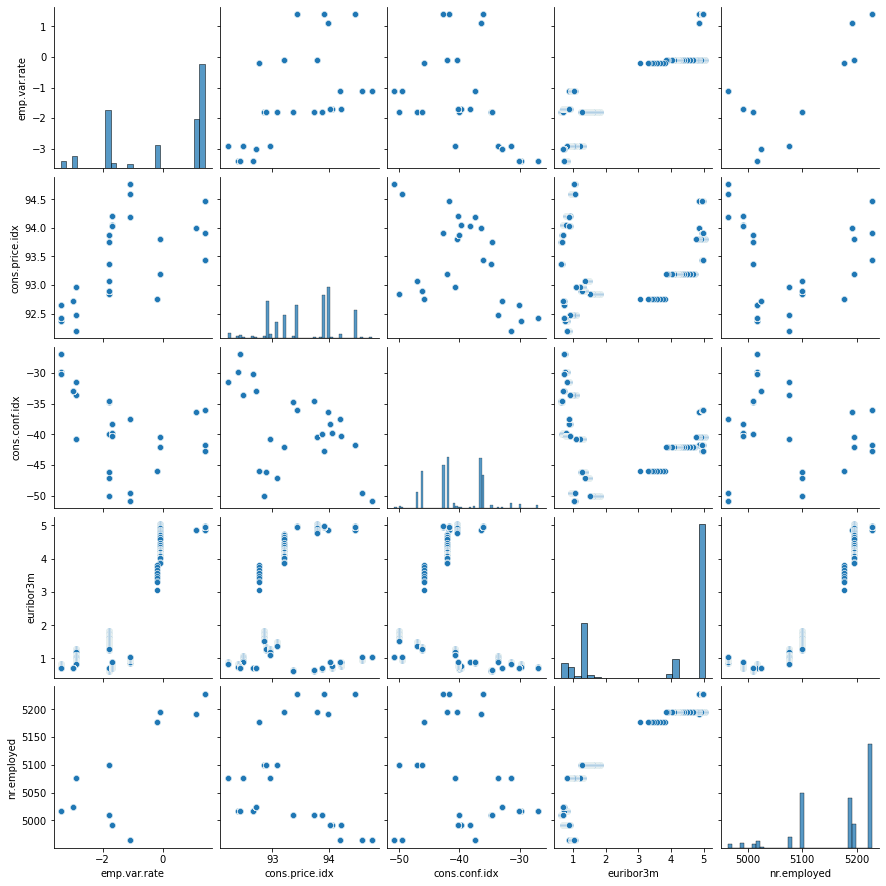

In [43]:
# Scatterplots of floating point dataset
sns.pairplot(floats)
plt.show()

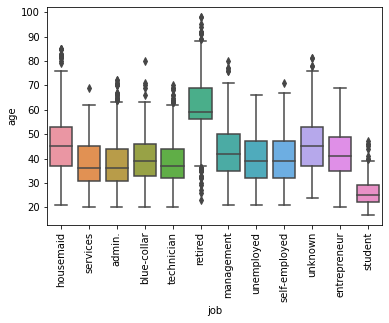

In [44]:
# Boxplot of age grouping by job
sns.boxplot(x = 'job', y = 'age', data = data)
plt.xticks(rotation = 90)
plt.show()

In [45]:
data['y'].replace('no',0,inplace = True)
data['y'].replace('yes',1,inplace = True)


In [46]:
data.campaign.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 19, 18, 23, 14,
       22, 25, 16, 17, 15, 20, 56, 39, 35, 42, 28, 26, 27, 32, 21, 24, 29,
       31, 30, 41, 37, 40, 33, 34, 43], dtype=int64)

In [47]:
data['y'].replace('no',0,inplace = True)
data['y'].replace('yes',1,inplace = True)

In [48]:
data['y'] = pd.to_numeric(data['y'])

In [49]:
campaign = data.groupby('campaign')[['y']].sum().join(data.groupby('campaign')[['y']].count(), how = 'outer', lsuffix = '_yes', rsuffix = '_tot')
campaign['prop'] = campaign['y_yes'].div(campaign['y_tot'])
campaign.head()

,y_yes,y_tot,prop
campaign,,,
1,2300,17642,0.130371
2,1211,10570,0.114570
3,574,5341,0.107471
4,249,2651,0.093927
5,120,1599,0.075047


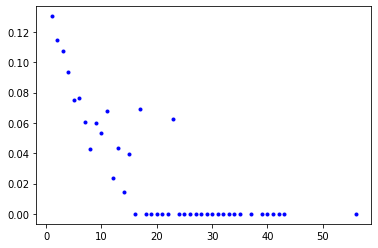

In [50]:
plt.plot(campaign.index, campaign.prop, marker = '.', linestyle = 'None', color = 'b')
plt.show()

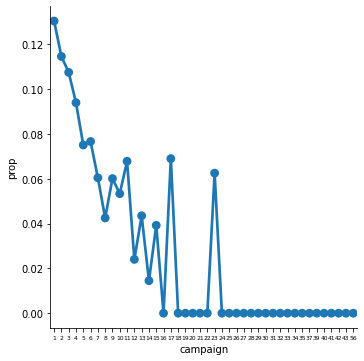

In [51]:
campaign2 = campaign.reset_index(drop = False)
sns.catplot(x = 'campaign', y = 'prop', data = campaign2, kind = 'point')
plt.xticks(size = 6)
plt.show()

## Categorical Feature Engineering

We will work with categorical the categorical features. We wil try to predict whether their job, marital status, and education can tell us whether they will accept the offered product in this campaign or not.

If we succeed with our machine learning model in predicting the outcome based on those attributes we will generate a strategy in which we will try to create a market segmentation based on our results.

In [52]:
cats.head(3)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0


In [53]:
# Data is imbalanced, check for y == 1 and y == 0
len(cats[cats.y == 1]) , len(cats[cats.y == 0])

(4640, 36548)

In [54]:
cats[cats.y == 0].index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41170, 41175, 41176, 41177, 41179, 41180, 41182, 41184, 41185,
            41187],
           dtype='int64', length=36548)

In [55]:
# Choose random sample without replacement of the zeros in the y column
np.random.seed(22)
zeros = cats.iloc[np.random.choice(cats[cats.y == 0].index, replace = False, size = len(cats[cats.y == 1]) ),:]

# Create cats balanced table
# QUESTION: DOES INDEX ORDER MATTER TO A LOGREG MODEL????
catsb = pd.concat([cats[cats.y == 1], zeros]).reset_index()
catsb = catsb.iloc[np.random.permutation(catsb.index),:].reset_index()
catsb = catsb.drop(['level_0','index'], axis = 1)
catsb.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,retired,married,high.school,no,no,yes,cellular,may,mon,nonexistent,0
1,management,married,university.degree,no,no,no,cellular,jun,mon,nonexistent,1
2,housemaid,married,basic.4y,no,no,no,telephone,may,thu,nonexistent,1
3,unknown,married,basic.6y,no,no,no,telephone,may,thu,nonexistent,0
4,retired,married,basic.4y,no,no,no,cellular,aug,thu,failure,1


In [56]:
# List number of elements per each categorical feature
list1 = pd.DataFrame([(catsb.columns[j], len(catsb.iloc[:,j].unique())) for j in range(11)], columns = ['feat', 'num'])
list2 = pd.DataFrame([(cats.columns[j], len(cats.iloc[:,j].unique())) for j in range(11)], columns = ['feat', 'num'])
pd.concat([list2, list1], axis = 1, join = 'outer', keys = ['original','balanced'])

original         balanced    
           feat num         feat num
0           job  12          job  12
1       marital   4      marital   4
2     education   8    education   8
3       default   3      default   2
4       housing   3      housing   3
5          loan   3         loan   3
6       contact   2      contact   2
7         month  10        month  10
8   day_of_week   5  day_of_week   5
9      poutcome   3     poutcome   3
10            y   2            y   2

In [57]:
# Check whether it is relevant the 'yes' answer... is it the same as 'unknown'???
cats[['default']].value_counts()

default
no         32588
unknown     8597
yes            3
dtype: int64

I want to know if it is possible to predict the outcome of the acceptance of the last call based on four different situations:

* "Social" features (job, marital status, and education)
* "Financial" features (existent housing loans, personal loans and default credits)
* "Communication" features (type of contact, month and day of last call, outcome of last call)

We will use a logistic regression model.

In [58]:
# Defining sets of categorical variables and dependent varible
feat1 = catsb.loc[:,['job','marital','education']]
feat2 = catsb.loc[:,['housing','loan','default']]
feat3 = catsb.loc[:,['contact','month','day_of_week','poutcome']]
feat4 = catsb.drop('y', axis = 1)
y = catsb[['y']]

In [59]:
y = np.array(y).reshape(-1)

### "Social features" model

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [61]:
# Create dummy variables
x1 = pd.get_dummies(feat1, drop_first = True)

In [62]:
# Defining training and test sets.
x1tr, x1te, y1tr, y1te = train_test_split(x1, y, test_size = 0.3, random_state = 123)

In [63]:
# Define hyperparameter space (c_space)
c_space = np.logspace(-5,8,15)
# Define grid
grid = {'C':c_space}
# Instatiate LogReg classifier
lr = LogisticRegression(solver = 'lbfgs', max_iter = 300)
# GridSearch
lrcv = GridSearchCV(lr, grid, cv = 5)

In [64]:
lrcv.fit(x1,y)
lrcv.best_params_

{'C': 0.006105402296585327}

In [65]:
lrcv.best_score_

0.5887931034482758

In [66]:
# Fitting model
lr = LogisticRegression(C = 0.006105, solver = 'lbfgs', max_iter = 300)
lr.fit(x1tr, y1tr)

LogisticRegression(C=0.006105, max_iter=300)

In [67]:
y1pr = lr.predict(x1te)

In [68]:
print(confusion_matrix(y1te,y1pr))

[[827 557]
 [561 839]]


In [69]:
print(classification_report(y1te, y1pr))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1384
           1       0.60      0.60      0.60      1400

    accuracy                           0.60      2784
   macro avg       0.60      0.60      0.60      2784
weighted avg       0.60      0.60      0.60      2784



### "Financial" Features

In [70]:
# Create dummy variables
x2 = pd.get_dummies(feat2, drop_first = True)

In [71]:
# Create training and test sets
x2tr, x2te, y2tr, y2te = train_test_split(x2, y, test_size = 0.3, random_state = 123)

In [72]:
# TUNNING
# Define hyperparameter space (c_space)
c_space = np.logspace(-5,8,15)
# Define grid
grid = {'C':c_space}
# Instatiate LogReg classifier
lr = LogisticRegression(solver = 'lbfgs', max_iter = 300)
# GridSearch
lrcv = GridSearchCV(lr, grid, cv = 5)

In [73]:
# Fitting and best C parameter
lrcv.fit(x2,y)
lrcv.best_params_

{'C': 8.483428982440725e-05}

In [74]:
# Scoring.
lrcv.best_score_

0.5672413793103448

In [75]:
# Fitting model
lr = LogisticRegression(C = 8.48342898, solver = 'lbfgs', max_iter = 250)
lr.fit(x2tr, y2tr)

LogisticRegression(C=8.48342898, max_iter=250)

In [76]:
y2pr = lr.predict(x2te)

__Metrics__

In [77]:
print(confusion_matrix(y2te, y2pr))

[[ 319 1065]
 [ 133 1267]]


In [78]:
print(classification_report(y2te, y2pr))

              precision    recall  f1-score   support

           0       0.71      0.23      0.35      1384
           1       0.54      0.91      0.68      1400

    accuracy                           0.57      2784
   macro avg       0.62      0.57      0.51      2784
weighted avg       0.62      0.57      0.51      2784



### "Communication" Features

In [79]:
# Dummies
x3 = pd.get_dummies(feat3, drop_first = True)

In [80]:
# Training and test sets
x3tr, x3te, y3tr, y3te = train_test_split(x3, y, test_size = 0.3, random_state = 123)

In [81]:
# TUNNING
# Define hyperparameter space (c_space)
c_space = np.logspace(-5,8,15)
# Define grid
grid = {'C':c_space}
# Instatiate LogReg classifier
lr = LogisticRegression(solver = 'lbfgs', max_iter = 300)
# GridSearch
lrcv = GridSearchCV(lr, grid, cv = 5)

In [82]:
lrcv.fit(x3,y)
lrcv.best_params_

{'C': 0.4393970560760795}

In [83]:
lrcv.best_score_

0.6876077586206897

In [84]:
lr = LogisticRegression(C = 0.439397, solver = 'lbfgs', max_iter = 250)
lr.fit(x3tr, y3tr)

LogisticRegression(C=0.439397, max_iter=250)

In [85]:
y3pr = lr.predict(x3te)

__Metrics__

In [86]:
print(confusion_matrix(y3te, y3pr))

[[1240  144]
 [ 702  698]]


In [87]:
print(classification_report(y3te, y3pr))

              precision    recall  f1-score   support

           0       0.64      0.90      0.75      1384
           1       0.83      0.50      0.62      1400

    accuracy                           0.70      2784
   macro avg       0.73      0.70      0.68      2784
weighted avg       0.73      0.70      0.68      2784



### All features

In [88]:
# Dummies
x4 = pd.get_dummies(feat4, drop_first = True)

In [89]:
# Train-test
x4tr, x4te, y4tr, y4te = train_test_split(x4, y, test_size = 0.3, random_state = 123)

In [90]:
# TUNNING
# Hyperparameter space
c_space = np.logspace(-5,8,15)
# Grid
grid = {'C':c_space}
# Instantiate classifier
lr = LogisticRegression(solver = 'lbfgs', max_iter = 250)

# GridSearchCV
lrcv = GridSearchCV(lr, grid, cv = 5)

In [91]:
# Fit model
lrcv.fit(x4,y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=250),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])})

In [92]:
lrcv.best_params_

{'C': 0.05179474679231213}

In [93]:
lrcv.best_score_

0.6934267241379309

In [94]:
# Model
lr = LogisticRegression(C = 0.051794, solver = 'lbfgs', max_iter = 250)
lr.fit(x4tr, y4tr)

LogisticRegression(C=0.051794, max_iter=250)

In [95]:
y4pr = lr.predict(x4te)

In [96]:
print(confusion_matrix(y4te, y4pr))

[[1109  275]
 [ 543  857]]


In [97]:
print(classification_report(y4te, y4pr))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73      1384
           1       0.76      0.61      0.68      1400

    accuracy                           0.71      2784
   macro avg       0.71      0.71      0.70      2784
weighted avg       0.71      0.71      0.70      2784



## Columns dictionary

#### Categorical
1. Job: Type of job: admin, blue collar, enrepreneur, housemaid, management, retired, self-employed, services, studnt, technician, uneployed, unknown.
2. Marital: divorced, married, sinle, unknown. Note: divorced means divorced or widowed.
3. Educaion: basic 4y, basic 6y, basic 9y, high school, iliterate, professional course university degree,unknown.
4. default: Has credit in default?, answers: no, yes, unknown.
5. Housing: Has housing loan?, answers: no, yes, unknown.
6. Loan: Has personal loan?, answers: no, yes, unknown.
7. Contact: Contact communication type: cellular, telephone.
8. Month: Last contact month of the year: jan, feb, mar, ...
9. Day of week: Last contact day of the weeue, ...
10. Poutcome: Outcome of previous campaign, failure, nonexistent, success.

#### Ints
1. age $  17 \leq a \leq 98 $.
2. Duration: last contact duation in seconds. Nte, if duraton = 0, then y = 'no'. After the call, the value of y is always known. Discard for realistic models.
3. Campaign: Number of contacts performed for this client, including last contact.
4. Pdays: Number of days that passed by after the client was last contacted from a previous campaign, value "999" means client was not previously contacted.
5. Previous: Number of conacts performed before this campaign.

#### Floats
16. Emp.var.rate: Employment variation rate quarterly indicator
17. Cons.Price.idx: Consumer price index monthly indicator.
18. Cons.conf.ix: Consmer confidnce index monthly indicator.
19. Euribor3m: Euribor 3 month rate daily indicator.
20. nr.employed:number of employees quarterly indicator.